# *Lab 7: Estimating changes between two elections*
### **ID1:206094278,ID2:205926660** 


In [1]:
import pandas as pd
import numpy as np
import os
import io
from matplotlib import pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.decomposition import PCA

#pd.set_option('display.max_rows', None)

In [2]:

df_ballots_2020 =pd.read_csv("votes per ballot 2020.csv", encoding = 'iso-8859-8', index_col='שם ישוב')
dict_party = {'מחל':'הליכוד','פה':'כחול לבן','ודעם':'הרשימה המשותפת','שס':'שס','ג':'יהדות התורה',
              'אמת':'העבודה גשר מרצ','ל':'ישראל ביתנו','טב':'ימינה'}
df_clean = df_ballots_2020.loc[:,["מחל","פה","ודעם","שס","ג","אמת","ל","טב"]]
df_clean=df_clean.drop("מעטפות חיצוניות")

#### Question 1

In [3]:
# a function that does a random sample for ballots
def random_pic(b,df,times):
    pic=[]
    total =[]
    for i in range(0,times):
        df_ran = df.sample(b)
        df_rans = df_ran.sum().div(df_ran.sum().sum())
        total.append(df_ran.sum().sum())
        pic.append(df_rans)

    return([pic,total])

b=10
times=100
p_hats = random_pic(b,df_clean,times)
tot = p_hats[1]
p_hats = pd.DataFrame(p_hats[0])
# the actual results of the eletion
p=df_clean.sum().div(df_clean.sum().sum())

#compute bias
display(print("bias is"),round(p_hats.mean()-p,3))

#compute variance
display(print("variance is"),round(p_hats.var(),3))

#compute MSE
display(print("MSE is"),round(p_hats.var() + np.power(p_hats.mean()-p,2),3))

bias is


None

מחל     0.003
פה     -0.000
ודעם   -0.015
שס      0.002
ג       0.006
אמת     0.002
ל       0.001
טב      0.003
dtype: float64

variance is


None

מחל     0.005
פה      0.006
ודעם    0.011
שס      0.001
ג       0.004
אמת     0.001
ל       0.000
טב      0.001
dtype: float64

MSE is


None

מחל     0.005
פה      0.006
ודעם    0.011
שס      0.001
ג       0.004
אמת     0.001
ל       0.000
טב      0.001
dtype: float64

#### Answer:
The bias of the estimator is close to zero in each party.<br>
But it is importent to notice that some parties have bias that is closer to zero form the others because of the random sample. <br>

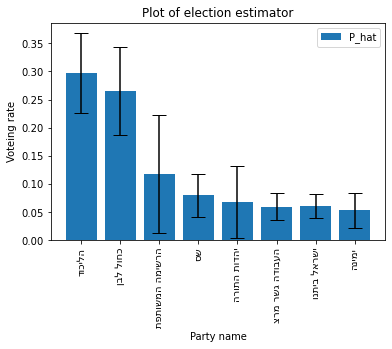

In [4]:
# a plot of the estimator with the sd
fig,ax=plt.subplots()
width =0.3
ax.bar(np.arange(8),p_hats.mean(),yerr=p_hats.std(),capsize=7,label = "P_hat")
ax.legend()
ax.set_ylabel("Voteing rate")
ax.set_xlabel("Party name")
ax.set_title("Plot of election estimator")
ax.set_xticks(np.arange(8))
ax.set_xticklabels([dict_party[i][::-1] for i in p_hats.columns],rotation=90)
plt.show()

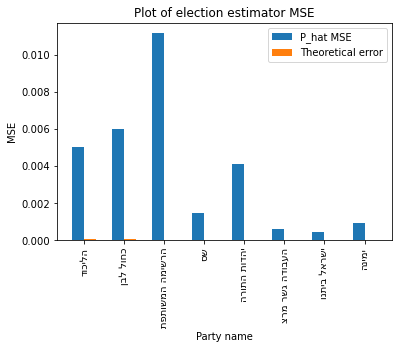

In [5]:
m = (sum(tot))/100
# a plot of the mse of our estimator with the theoretical eror
fig,ax=plt.subplots()
width =0.3
ax.bar(np.arange(8)-0.15,p_hats.var() +np.power(p_hats.mean()-p,2),width,label = "P_hat MSE")
ax.bar(np.arange(8)+0.15,p*(1-p)/m,width,label="Theoretical error")
ax.legend()
ax.set_ylabel("MSE")
ax.set_xlabel("Party name")
ax.set_title("Plot of election estimator MSE")
ax.set_xticks(np.arange(8))
ax.set_xticklabels([dict_party[i][::-1] for i in p_hats.columns],rotation=90)
plt.show()

#### Question 2

In [9]:
social_rate =pd.read_excel('eshkol_hevrati_calcali.xlsx', encoding = 'iso-8859-8')
votes_per_ballots2  = pd.read_csv("votes per ballot 2019b.csv", encoding = 'iso-8859-8', index_col='סמל ישוב')
votes_per_ballots2 = votes_per_ballots2.loc[:,["בזב","כשרים", "אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס"]]
social_rate.rename(columns={'name':'שם ישוב',"set_code":"סמל ישוב"}, inplace=True)
merged = pd.merge(votes_per_ballots2,social_rate ,how='inner', on='סמל ישוב') # mergeing the two data frames
display(merged)
merged = merged.set_index("שם ישוב")
merged = merged.loc[:,["מחל","פה","ודעם","שס","ג","אמת","ל","טב","eco_level"]]

,סמל ישוב,בזב,כשרים,אמת,ג,ודעם,טב,ל,מחל,פה,שס,שם ישוב,population,index_value,eco_level
0,472,525,265,8,0,194,0,1,8,25,5,אבו גוש,6894.604873,-0.761583,3
1,472,686,357,5,0,290,0,4,4,33,6,אבו גוש,6894.604873,-0.761583,3
2,472,579,332,5,1,217,0,1,30,40,18,אבו גוש,6894.604873,-0.761583,3
3,472,761,398,5,0,281,1,2,21,55,3,אבו גוש,6894.604873,-0.761583,3
4,472,541,227,7,1,148,0,0,18,31,3,אבו גוש,6894.604873,-0.761583,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10450,3563,739,527,9,11,2,314,15,95,30,6,תקוע,3495.000000,-0.031000,5
10451,3563,658,458,13,14,1,176,21,166,19,11,תקוע,3495.000000,-0.031000,5
10452,3563,700,539,9,3,0,308,6,133,25,12,תקוע,3495.000000,-0.031000,5
10453,1346,574,205,5,1,115,1,0,63,8,2,תרבין א-צאנע (יישוב),437.000000,-3.103000,1


In [ ]:
# a function that choose 10 settelemnts from each one of thr eco levels
def random_pic2(df):
    pic2 = pd.DataFrame() 
    for i in range(1,11):
        eco=df[df.eco_level==i]
        pol = eco.sample(1)
        pic2=pic2.append(pol)
    return(pic2)

# a loop that compute the total number of voters in each eco level
big_N = []
for i in range(1,11):
    eco=merged[merged.eco_level==i].iloc[:,0:8]
    eco = eco.sum().sum()
    big_N.append(eco)

# a function that calculate P_hat for the eco level sample
def caleco(df):
    df = df.iloc[:,0:8]
    yo = df.sum(axis=1)
    df = df.div(yo,axis=0)
    p_hat_new = df.mul(big_N,axis=0).sum()/sum(big_N)
    return(p_hat_new)

In [ ]:
tr = random_pic2(merged)
display(tr)

In [ ]:
tr1 =caleco(tr)
display(tr1)

In [ ]:
eco_sam = []
for i in range(0,100):
    sam= caleco(random_pic2(merged))
    eco_sam.append(sam)
    
eco_sam = pd.DataFrame(eco_sam)    

In [ ]:
#compute bias
display(print("bias is"),round(eco_sam.mean()-p,3))

#compute variance
display(print("variance is"),round(eco_sam.var(),3))

#compute MSE
display(print("MSE is"),round(eco_sam.var() + np.power(eco_sam.mean()-p,2),3))

In [ ]:
fig,ax=plt.subplots()
width =0.3
ax.bar(np.arange(8)-0.15,p_hats.var() +np.power(p_hats.mean()-p,2),width,label = "P_hat MSE")
ax.bar(np.arange(8)+0.15,eco_sam.var() + np.power(eco_sam.mean()-p,2),width,label="P_hat eshcolot MSE")
ax.legend()
ax.set_ylabel("MSE")
ax.set_xlabel("Party name")
ax.set_title("Plot of election estimator MSE")
ax.set_xticks(np.arange(8))
ax.set_xticklabels([dict_party[i][::-1] for i in p_hats.columns],rotation=90)
plt.show()

display(print("sum MSE of parties method 1 "),round(sum(p_hats.var() +np.power(p_hats.mean()-p,2)),3))
display(print("sum MSE of parties method 2 "),round(sum(eco_sam.var() +np.power(eco_sam.mean()-p,2)),3))

#### Answer:
From the comparison of the MSE function for each of the method it is clear that the second method is better(in MSE standard)<br>
But why did it happend?, if we take a look of the bias and variance of the second method and compare it to the first method<br> we will see that $$bias_1 < bias_2$$ $$Var_1 > Var_2$$ for most parties and<br>
The second method simply used a bias-variance trade off to crate an estimator with lower MSE.<br> 

#### Question 3 artical a

In [ ]:
q = votes_per_ballots2.loc[:,["מחל","פה","ודעם","שס","ג","אמת","ל","טב"]].sum().div(votes_per_ballots2.loc[:,["מחל","פה","ודעם","שס","ג","אמת","ל","טב"]].sum().sum())
ran = np.arange(0,1.0,0.01)
# for loops that compute the variance' bias and MSE for each alpha
alpha = []
for a in ran:
    alpha.append(a*p_hats.mean() +(1-a)*q)
    
alpha = pd.DataFrame(alpha)

var_alpha = []
for a in ran:
    var_alpha.append(pow(a,2)*p_hats.var())
    
var_alpha = pd.DataFrame(var_alpha)

bias2_alpha = []
for a in ran:
    bias2_alpha.append(pow((1-a),2)*pow((q-p),2))
 


In [ ]:
bias2_alpha = pd.DataFrame(bias2_alpha) 

MSE_alpha = var_alpha + bias2_alpha

In [ ]:
var_alpha

In [ ]:
bias2_alpha

In [ ]:
MSE_alpha

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(18,10))
plt.subplots_adjust(hspace =1,wspace =1)
for i in range(0,2):
    for j in range(0,4):
        if i==0:
            ax[i,j].plot(var_alpha.iloc[:,j],label = "Variance")
            ax[i,j].plot(bias2_alpha.iloc[:,j],label ="bias^2")
            ax[i,j].plot(MSE_alpha.iloc[:,j],label ="MSE" )
            ax[i,j].set_xticklabels([0,0,0.5,1])
            ax[i,j].set_xlabel('Alpha')
            ax[i,j].legend()
            ax[i,j].set_title("Variance,bias^2 and MSE for ""\n"+dict_party[var_alpha.columns[j]][::-1])
        else:
            ax[i,j].plot(var_alpha.iloc[:,j+4],label = "Variance")
            ax[i,j].plot(bias2_alpha.iloc[:,j+4],label ="bias^2")
            ax[i,j].plot(MSE_alpha.iloc[:,j+4],label ="MSE")
            ax[i,j].set_xticklabels([0,0,0.5,1])
            ax[i,j].set_xlabel('Alpha')
            ax[i,j].legend()
            ax[i,j].set_title("Variance,bias^2 and MSE for ""\n"+dict_party[var_alpha.columns[j+4]][::-1])
plt.show()            

#### Answer:
because $q_j$ is the 2019b election resolts and very close to $p_j$(the election resolts in 2020) in most parties when<br> $\alpha = 0$ we left with an unbiased estimator to the election that is not random and very close to zero.<br>
(it is possibole so see in parties like the "joint list", "blue&white" and "shas")<br>
As for the chose of $\alpha = 0.5 $ or $\alpha = 1$ it is clear from the plot that the chose of $\alpha = 1$ will maximaize<br>
the MSE for all the parites.
Unlike the chose of $\alpha = 0.5 $ which according to the plots will guarantee to reduce the MSE.<br>
(note that this can also be inferred from the fact that MSE is a parabola with a minimum point so a move from a "higher"<br> point to a point that closer to the minimun will guarantee to reduce in the "y" values).

#### Question 3 artical b

First we will find the derivative of the MSE<br>
$$ MSE(\hat{P_{j}})=\alpha^2_{j}\sigma^2_{j} + bias^2(\hat{P_{j}},P_{j})$$
$$ MSE(\hat{P_{j}})=\alpha^2_{j}\sigma^2_{j} + ((1-\alpha_{j})(Q_{j}-P_{j}))^2$$
$$ \frac{d}{d\alpha_{j}}MSE(\hat{P_{j}})=2\alpha_{j}\sigma^2_{j} -2((1-\alpha_{j})({Q_{j}}-P_{j})^2$$<br>
Now set the derivative to zero and solve for $\alpha_{j}$<br>
$$2\alpha_{j}\sigma^2_{j} -2((1-\alpha_{j})(Q_{j}-P_{j})^2=0$$
$$\alpha_{j}\sigma^2_{j}- (Q_{j}-P_{j})^2 +\alpha_{j}(Q_{j}-P_{j})^2=0$$
$$ \alpha_{j}(\sigma^2_{j} + (Q_{j}-P_{j})^2 = (Q_{j}-P_{j})^2$$
$$ \alpha_{j} = \frac{(Q_{j}-P_{j})^2}{\sigma^2_{j} + (Q_{j}-P_{j})^2}$$

In [ ]:
# computing the alpha vector
alpha_vec = pow((q-p),2).div(pow((q-p),2) + p_hats.var())
alpha_vec
# the same plots from artical a but this time with the argmin
fig,ax = plt.subplots(2,4,figsize=(18,10))
plt.subplots_adjust(hspace =1,wspace =1)
for i in range(0,2):
    for j in range(0,4):
        if i==0:
            ax[i,j].plot(var_alpha.iloc[:,j],label = "Variance")
            ax[i,j].plot(bias2_alpha.iloc[:,j],label ="bias^2")
            ax[i,j].plot(MSE_alpha.iloc[:,j],label ="MSE" )
            ax[i,j].scatter(alpha_vec[j]*100,MSE_alpha.iloc[int(round(alpha_vec[j]*100)),j],color="red",label="min MSE")
            ax[i,j].set_xticklabels([0,0,0.5,1])
            ax[i,j].set_xlabel('Alpha')
            ax[i,j].legend()
            ax[i,j].set_title("Variance,bias^2 and MSE for ""\n"+dict_party[var_alpha.columns[j]][::-1])
        else:
            ax[i,j].plot(var_alpha.iloc[:,j+4],label = "Variance")
            ax[i,j].plot(bias2_alpha.iloc[:,j+4],label ="bias^2")
            ax[i,j].plot(MSE_alpha.iloc[:,j+4],label ="MSE")
            ax[i,j].scatter(alpha_vec[j+4]*100,MSE_alpha.iloc[int(round(alpha_vec[j+4]*100)),j+4],color="red",label="min MSE")
            ax[i,j].set_xticklabels([0,0,0.5,1])
            ax[i,j].set_xlabel('Alpha')
            ax[i,j].legend()
            ax[i,j].set_title("Variance,bias^2 and MSE for ""\n"+dict_party[var_alpha.columns[j+4]][::-1])
plt.show()            


In [ ]:
# to show that the points in the plots are minimun we will compre the our minimum with the built in 
# minumum function
min_vec = [MSE_alpha.iloc[int(round(alpha_vec[j]*100)),j] for j in  range(0,8)]
min_vec

In [ ]:
# a function that show the minimum MSE for each party and show it in a vector
def show_min(df):
    vec= []
    for i in range(len(df.T)):
        vec.append(min(MSE_alpha.iloc[:,i])) # use python mim
    return(vec)    

In [ ]:
gg=show_min(MSE_alpha) # same vector
display(gg)
gg==min_vec

can we use this formula in advanced To determine the estimation?
the answer is yes.<br>
the reason is that if the estimator $\hat{P}$ unbiased, it is easy to find the derivative of the MSE and solve it for<br> MSE'=0<br>
and due to the fect that MSE is a "smiling" parabola the solution is the arg min of the MSE function.
